In [ ]:
'''
This is a simple program to count the number of CFU as determined by spotting on plate. To use, 
be sure to save an excel file in the proper format: if, for instance, one did 3 rows of 
spottings on a plate, the first column should have a blank first row, then 'plate name' in the next three rows 
(i.e., ".8mM"). The corresponding rows in the next column over should contain the number of the row of spots (i.e., 
"1","2","3")

The next 8 columns will contain the data. There MUST be a header (top row, where the blank was for the treatment
name) containing the exponent of the dilution factor (and this script assumes that the dilution is base 10).
Sheet names provided in excel will carry through and be used. Strings (i.e., "lawn" or "l") are fine, but will be
converted to NaN. Blanks will also be converted to NaN, and are preferable to 0's, as zeroes will not be skipped
when calculating the mean- only spots that contain colonies should be averaged, as I understand it. 

Save the spreadsheet with an appropriate name, and replace the file path in the first line, second cell with the 
path of the desired file. Then, open up jupyter notebook (or other python environment, with some adjustment)
and run the code.

The final result is stored as a dict, with the key being the name of the sheet.

The second part allows the calculation of % survival from the first cfu of the first sheet, assumed to be
the no treatment culture, no treatment plate, as it is in my experiment. adjust as needed.
'''

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
data1 = pd.read_excel("distribexp 190120.xlsx", sheet_name=None, comment='#')
data2 = pd.read_excel("shifteddistexp190123.xlsx", sheet_name=None, comment='#')
def cfu_calc(data):
    cfu = []
    treat = []
    for k in data:
        curr_df = data[k]
        #print(data[k])
        temp_dilute = pd.DataFrame()
        for i in curr_df.iloc[:,]:
            #print(i)
            curr_df[i]=pd.to_numeric(curr_df[i],errors = 'coerce')
            dilute = curr_df[i] * (10 ** (-i))
            temp_dilute[i] = dilute
            #print(temp_dilute)
            cfus = temp_dilute.mean(axis = 0, level = 0)
            cfus = cfus.mean(axis = 1, skipna= 1)
            cfus = cfus * 100
        print("Treatment:",k,", CFU/mL")
        cfu.append(cfus)
        treat.append(k)
    cfudict = dict(zip(treat,cfu))
    return(cfudict)
cfml = cfu_calc(data1)
cfml
shcfml = cfu_calc(data2)

Treatment: NT , CFU/mL
Treatment: NT2 , CFU/mL
Treatment: .6M NaCl , CFU/mL
Treatment: .8mM F , CFU/mL
Treatment: NT , CFU/mL
Treatment: .8mM F , CFU/mL
Treatment: 1mM F , CFU/mL


In [94]:
print(shcfml)

{'NT': NT          2.600000e+09
.6mM F      2.790000e+06
.8mM F      1.000000e+05
1mM F       1.800000e+04
1.2mM F     1.000000e+03
.2M NaCl    4.250000e+09
.4M NaCl    3.116667e+09
.6M NaCl    3.350000e+09
.8M NaCl    5.500000e+03
dtype: float64, '.8mM F': NT          1.700000e+09
.6mM F      4.622222e+09
.8mM F      6.238889e+05
1mM F       1.783333e+05
1.2mM F     1.100000e+04
.2M NaCl    1.800000e+09
.4M NaCl    1.966667e+08
.6M NaCl    2.333333e+09
.8M NaCl             NaN
dtype: float64, '1mM F': NT          1.566667e+09
.6mM F      1.566667e+09
.8mM F      1.500000e+06
1mM F       9.833333e+04
1.2mM F     2.783333e+04
.2M NaCl    1.166667e+09
.4M NaCl    1.266667e+09
.6M NaCl    1.416667e+09
.8M NaCl             NaN
dtype: float64}


Treatment: NT
NT          1.000000
.2mM F      1.483660
.4mM F      1.483660
.6mM F      0.352941
.8mM F      0.000902
1 mM F           NaN
.2M NaCl    1.254902
.4M NaCl    1.620915
.6M NaCl    1.555556
.8M NaCl         NaN
dtype: float64
Treatment: NT2
NT          0.967320
.2mM F      1.799564
.4mM F      1.163399
.6mM F      0.614379
.8mM F      0.000059
1 mM F           NaN
.2M NaCl    1.751634
.4M NaCl    1.352941
.6M NaCl    1.385621
.8M NaCl         NaN
dtype: float64
Treatment: .6M NaCl
NT          1.515033
.2mM F      0.282353
.4mM F      0.265359
.6mM F      0.094118
.8mM F      0.000536
1 mM F           NaN
.2M NaCl    0.314161
.4M NaCl    0.157516
.6M NaCl         NaN
.8M NaCl         NaN
dtype: float64
Treatment: .8mM F
NT          1.313725
.2mM F      1.137255
.4mM F      0.705882
.6mM F      1.039216
.8mM F      0.100000
1 mM F      0.000085
.2M NaCl    0.960784
.4M NaCl    3.313725
.6M NaCl    1.117647
.8M NaCl         NaN
dtype: float64


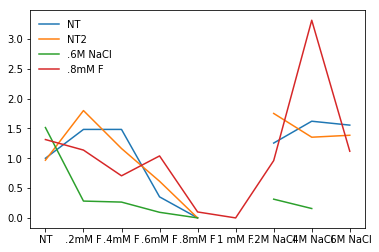

In [100]:
nt = cfml['NT'][0]
for i in cfml:
    print("Treatment:",i)
    per = cfml[i][:]/nt
    plt.plot(per,label = i)
    plt.legend(loc='upper left', frameon=False)
    print(per)


Treatment: NT
NT          1.019608e+00
.6mM F      1.094118e-03
.8mM F      3.921569e-05
1mM F       7.058824e-06
1.2mM F     3.921569e-07
.2M NaCl    1.666667e+00
.4M NaCl    1.222222e+00
.6M NaCl    1.313725e+00
.8M NaCl    2.156863e-06
dtype: float64
Treatment: .8mM F
NT          0.666667
.6mM F      1.812636
.8mM F      0.000245
1mM F       0.000070
1.2mM F     0.000004
.2M NaCl    0.705882
.4M NaCl    0.077124
.6M NaCl    0.915033
.8M NaCl         NaN
dtype: float64
Treatment: 1mM F
NT          0.614379
.6mM F      0.614379
.8mM F      0.000588
1mM F       0.000039
1.2mM F     0.000011
.2M NaCl    0.457516
.4M NaCl    0.496732
.6M NaCl    0.555556
.8M NaCl         NaN
dtype: float64


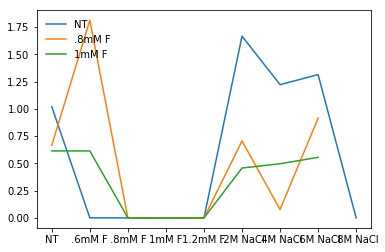

In [98]:
for i in shcfml:
    print("Treatment:",i)
    per = shcfml[i][:]/nt
    print(per)
    plt.plot(per,label = i)
    plt.legend(loc='upper left', frameon=False)